In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
#from plotly import __version__
#import plotly as py
#import cufflinks as cf
%matplotlib inline


In [3]:
sns.__version__

'0.9.0'

In [4]:
Loan_ML=pd.read_csv('data/filterDV_loans.csv',low_memory=False)

In [5]:
Loan_ML.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,last_pymnt_amnt,delinq_amnt,fico_average
0,5000.0,0,10.65,162.87,5,10,4,24000.0,0,0,...,3.0,0.0,13648.0,83.7,9.0,863.16,0.00,171.62,0.0,737.0
1,2500.0,1,15.27,59.83,4,0,4,30000.0,0,1,...,3.0,0.0,1687.0,9.4,4.0,435.17,0.00,119.66,0.0,742.0
2,2400.0,0,15.96,84.33,4,10,4,12252.0,1,0,...,2.0,0.0,2956.0,98.5,10.0,605.67,0.00,649.91,0.0,737.0
3,10000.0,0,13.49,339.31,4,10,4,49200.0,0,0,...,10.0,0.0,5598.0,21.0,37.0,2214.92,16.97,357.48,0.0,692.0
4,5000.0,0,7.90,156.46,6,3,4,36000.0,0,0,...,9.0,0.0,7963.0,28.3,12.0,632.21,0.00,161.03,0.0,732.0


In [6]:
Loan_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41564 entries, 0 to 41563
Data columns (total 24 columns):
loan_amnt              41564 non-null float64
term                   41564 non-null int64
int_rate               41564 non-null float64
installment            41564 non-null float64
grade                  41564 non-null int64
emp_length             41564 non-null int64
home_ownership         41564 non-null int64
annual_inc             41564 non-null float64
verification_status    41564 non-null int64
loan_status            41564 non-null int64
purpose                41564 non-null int64
dti                    41564 non-null float64
delinq_2yrs            41564 non-null float64
inq_last_6mths         41564 non-null float64
open_acc               41564 non-null float64
pub_rec                41564 non-null float64
revol_bal              41564 non-null float64
revol_util             41564 non-null float64
total_acc              41564 non-null float64
total_rec_int          41564 no

In [7]:
from sklearn import datasets

In [8]:
plt.style.use('ggplot')

In [9]:
# Spliting Data in training and test.
# Y is target value and X is feature 
y = Loan_ML.loc[:, Loan_ML.columns == 'loan_status']
x =Loan_ML.drop('loan_status',axis=1)

In [10]:
y.shape
#y = y.reshape(-1,1)

(41564, 1)

In [11]:
y.head()


,loan_status
0,0
1,1
2,0
3,0
4,0


In [12]:
x.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,last_pymnt_amnt,delinq_amnt,fico_average
0,5000.0,0,10.65,162.87,5,10,4,24000.0,0,12,...,3.0,0.0,13648.0,83.7,9.0,863.16,0.00,171.62,0.0,737.0
1,2500.0,1,15.27,59.83,4,0,4,30000.0,0,7,...,3.0,0.0,1687.0,9.4,4.0,435.17,0.00,119.66,0.0,742.0
2,2400.0,0,15.96,84.33,4,10,4,12252.0,1,8,...,2.0,0.0,2956.0,98.5,10.0,605.67,0.00,649.91,0.0,737.0
3,10000.0,0,13.49,339.31,4,10,4,49200.0,0,10,...,10.0,0.0,5598.0,21.0,37.0,2214.92,16.97,357.48,0.0,692.0
4,5000.0,0,7.90,156.46,6,3,4,36000.0,0,2,...,9.0,0.0,7963.0,28.3,12.0,632.21,0.00,161.03,0.0,732.0


In [13]:
x.shape



(41564, 23)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [16]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (33251, 23)
Number transactions y_train dataset:  (33251, 1)
Number transactions X_test dataset:  (8313, 23)
Number transactions y_test dataset:  (8313, 1)


In [17]:
y_train['loan_status'].value_counts()

0    28256
1     4995
Name: loan_status, dtype: int64

If we see training dataset minority and majority sample count. It is very unbalnced and need to resampling to get proper result  

In [18]:
from imblearn.combine import SMOTETomek

In [19]:
# create new data set columns
columns_x = X_train.columns
columns_y = y_train.columns

In [20]:
sm = SMOTETomek(ratio='auto', random_state=0)

In [21]:
sm_X,sm_y = sm.fit_sample(X_train, y_train.values.ravel())

In [22]:
sm_X = pd.DataFrame(data=sm_X,columns=columns_x)
sm_y = pd.DataFrame(data=sm_y,columns=columns_y)

In [23]:
print("length of oversampled data is ",len(sm_X))
print("Number of defaulters",len(sm_y[sm_y['loan_status']==1]))
print("Number of non-defaulters",len(sm_y[sm_y['loan_status']==0]))

length of oversampled data is  55154
Number of defaulters 27577
Number of non-defaulters 27577


In [24]:

from sklearn.preprocessing import MinMaxScaler

In [25]:
y_train = sm_y

In [26]:
# fit_transform Fit to data anf then ttransform
#.transform scale fetaure of x acording to feature range 
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(sm_X), columns=sm_X.columns.values, index=sm_X.index.values)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns.values, index=X_test.index.values)

In [27]:
X_train.shape

(55154, 23)

In [28]:
X_test.shape

(8313, 23)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
#from joblib import joblib

In [30]:
import sklearn
print(sklearn.__version__)

0.21.3


In [31]:
logreg = LogisticRegression(random_state=0, solver ='saga', max_iter=2000, penalty='l1')

In [32]:
logreg.fit(X_train,y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
rfe = RFE(logreg, 21)
rfe = rfe.fit(X_train, y_train.values.ravel())
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True]
[1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1]


In [34]:
import statsmodels.api as st

In [35]:

logit_model=st.Logit(y_train.values.ravel(),X_train, missing = 'drop')
result=logit_model.fit_regularized(maxiter=2000)
print(result.summary2())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.3780639607162183
            Iterations: 249
            Function evaluations: 250
            Gradient evaluations: 249
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.455     
Dependent Variable:       y                      AIC:                    41749.4794
Date:                     2019-11-04 22:43       BIC:                    41954.5907
No. Observations:         55154                  Log-Likelihood:         -20852.   
Df Model:                 22                     LL-Null:                -38230.   
Df Residuals:             55131                  LLR p-value:            0.0000    
Converged:                1.0000                 Scale:                  1.0000    
No. Iterations:           249.0000                                                 
-----------------------------------------------------------------

Columns greter than p value 0.5 should be remove like [installment,home_ownership,emp_length,verification_status,dti,delinq_2yrs,delinq_amnt,revol_bal, revol_util] 

In [36]:
large_pvalue= ['installment','home_ownership','emp_length','verification_status','dti','delinq_2yrs','delinq_amnt','revol_bal','revol_util']
X_train_N = X_train.drop(large_pvalue, axis=1)
X_test_N = X_test.drop(large_pvalue, axis=1)

In [37]:
logreg2 = LogisticRegression(random_state=0, solver ='saga', max_iter=2000, penalty='l1')
logreg2.fit(X_train_N,y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:

logit_model2=st.Logit(y_train.values.ravel(),X_train_N, missing = 'drop')
result2=logit_model2.fit_regularized(maxiter=2000)
print(result2.summary2())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.3788637135337352
            Iterations: 138
            Function evaluations: 138
            Gradient evaluations: 138
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.453     
Dependent Variable:    y                 AIC:               41819.6985
Date:                  2019-11-04 22:43  BIC:               41944.5489
No. Observations:      55154             Log-Likelihood:    -20896.   
Df Model:              13                LL-Null:           -38230.   
Df Residuals:          55140             LLR p-value:       0.0000    
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        138.0000                                       
----------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
---------------------------------

P value 0.5 higher is removed from data 

In [39]:
# Predicting the test dataset using our new model.
y_pred_lr = logreg2.predict(X_test_N)

In [40]:
#%%pixie_debugger
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred_lr)
prec = precision_score(y_test, y_pred_lr)
rec = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]], 
                       columns = ['Model','Accuracy','Precision','Recall Score','F1 Score'])
print(results)

                 Model  Accuracy  Precision  Recall Score  F1 Score
0  Logistic Regression  0.812102   0.444398      0.820216  0.576464


In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pixiedust 


Pixiedust database opened successfully


In [42]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      7017
           1       0.44      0.82      0.58      1296

    accuracy                           0.81      8313
   macro avg       0.70      0.82      0.73      8313
weighted avg       0.88      0.81      0.83      8313



In [43]:
# import itertools
# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                  horizontalalignment="center",color='black')
# #                color="white" if cm[i, j] > thresh else "black")
   
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     plt.tight_layout()



In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (8,6), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    print(confusion_matrix)
    fig = plt.figure(figsize=figsize)
    kws = dict(horizontalalignment="center",color='red',fontsize='20')
    try:
        heatmap = sns.heatmap(df_cm, cmap="Blues",annot=True, fmt="d",annot_kws=kws)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
#    return fig



[[5688 1329]
 [ 233 1063]]


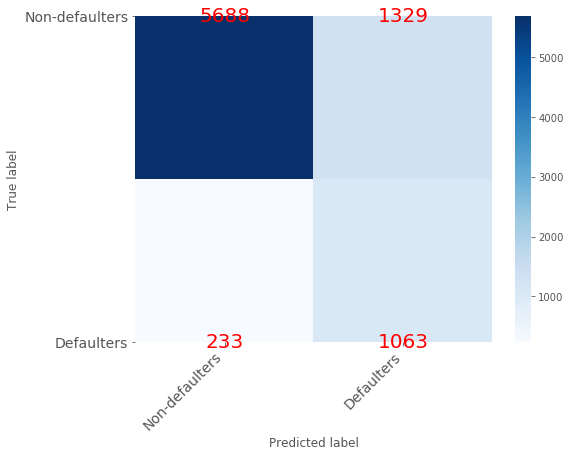

In [45]:
cm = confusion_matrix(y_test,y_pred_lr)
#np.set_printoptions(precision=2)
classes_name= ('Non-defaulters','Defaulters')
print_confusion_matrix(cm,class_names=classes_name )

In [46]:
# Creating a function to plot the ROC curves.
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
sns.set('talk', 'whitegrid', 'dark', font_scale=1,rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, label):
    f_pred, t_pred, _ = roc_curve(truth,pred)
    roc_auc = auc(f_pred, t_pred)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(f_pred, t_pred, color= c, linewidth=2, label= label +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', linewidth=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')  
    plt.legend(loc="lower right")

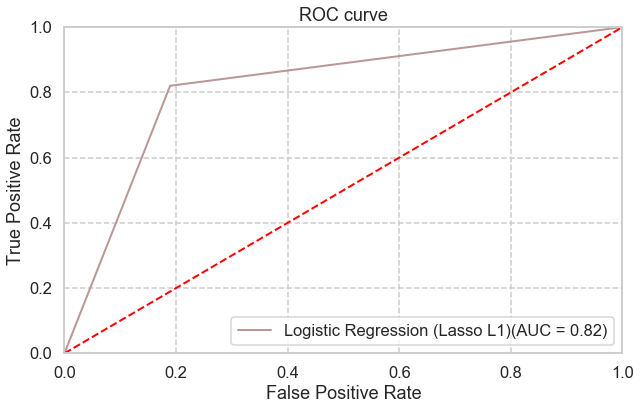

In [47]:
plt.figure(figsize=(10,6))
plotAUC(y_test, y_pred_lr, 'Logistic Regression (Lasso L1)')
plt.show()

In [48]:
#Kfold creoss validation 
from sklearn.model_selection import cross_val_score
sns.set()

In [49]:
accuracies_tr = cross_val_score(estimator=logreg2, X=X_train_N, y=y_train.values.ravel(), cv=10 )
print("Logistic Regression Classifier accuracy on train set is %0.2f with a deviation of +/- %0.2f: " 
      % (accuracies_tr.mean(), accuracies_tr.std()*2))

accuracies_ts = cross_val_score(estimator=logreg2, X=X_test_N, y=y_test.values.ravel(), cv=10 )
print("Logistic Regression Classifier accuracy on test set is %0.2f with a deviation of +/- %0.2f: " 
      % (accuracies_ts.mean(), accuracies_ts.std()*2))

Logistic Regression Classifier accuracy on train set is 0.84 with a deviation of +/- 0.02: 
Logistic Regression Classifier accuracy on test set is 0.88 with a deviation of +/- 0.01: 


In [50]:
#desission tree 
from sklearn.tree import DecisionTreeClassifier

In [51]:
dtc = DecisionTreeClassifier(random_state=0, criterion='entropy')
dtc.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [52]:
y_pred_dt = dtc.predict(X_test)

In [53]:
acc = accuracy_score(y_test, y_pred_dt)
prec = precision_score(y_test, y_pred_dt)
rec = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
dtc_results = pd.DataFrame([['Decision Tree Classifier', acc, prec, rec, f1]], 
                           columns = ['Model','Accuracy','Precision','Recall Score','F1 Score'])
results = results.append(dtc_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall Score,F1 Score
0,Logistic Regression,0.812102,0.444398,0.820216,0.576464
1,Decision Tree Classifier,0.892939,0.647529,0.687500,0.666916


[[6532  485]
 [ 405  891]]


<Figure size 720x432 with 0 Axes>

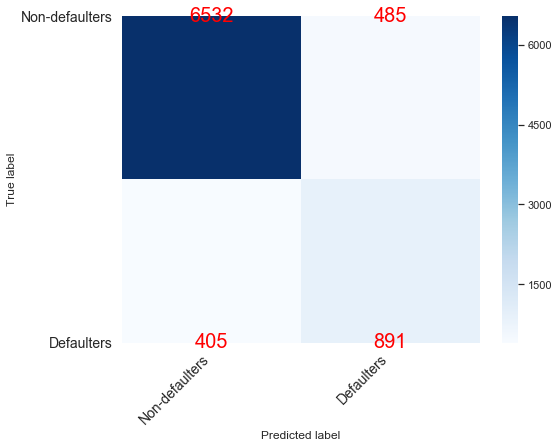

In [54]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test,y_pred_dt)
print_confusion_matrix(cm, ['Non-defaulters','Defaulters'])

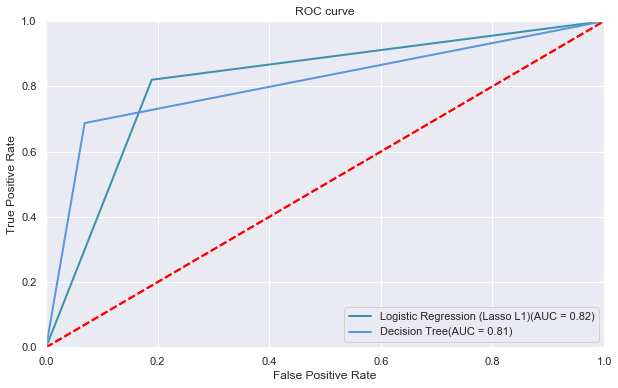

In [55]:
plt.figure(figsize=(10,6))
plotAUC(y_test, y_pred_lr, 'Logistic Regression (Lasso L1)')
plotAUC(y_test, y_pred_dt, 'Decision Tree')
plt.show()

In [56]:
accuracies_tr = cross_val_score(estimator=dtc, X=X_train, y=y_train.values.ravel(), cv=10 )
print("Decision Tree Classifier accuracy on train set is %0.2f with a deviation of +/- %0.2f: " 
      % (accuracies_tr.mean(), accuracies_tr.std()*2))

accuracies_ts = cross_val_score(estimator=dtc, X=X_test, y=y_test.values.ravel(), cv=10 )
print("Decision Tree Classifier accuracy on test set is %0.2f with a deviation of +/- %0.2f: " 
      % (accuracies_ts.mean(), accuracies_ts.std()*2))

Decision Tree Classifier accuracy on train set is 0.93 with a deviation of +/- 0.12: 
Decision Tree Classifier accuracy on test set is 0.89 with a deviation of +/- 0.02: 


In [57]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfc = RandomForestClassifier(random_state=0, n_estimators=100, criterion='entropy')
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [59]:
y_pred_rf = rfc.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
rfc_results = pd.DataFrame([['Random_Forest_n=100', acc, prec, rec, f1]], 
                           columns = ['Model','Accuracy','Precision','Recall Score','F1 Score'])
results = results.append(rfc_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall Score,F1 Score
0,Logistic Regression,0.812102,0.444398,0.820216,0.576464
1,Decision Tree Classifier,0.892939,0.647529,0.687500,0.666916
2,Random_Forest_n=100,0.909419,0.813149,0.543981,0.651872


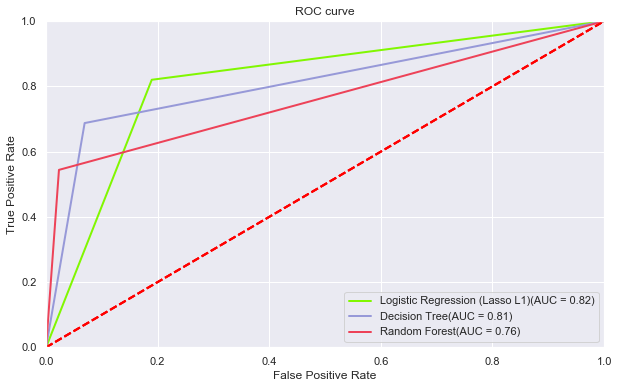

In [61]:
plt.figure(figsize=(10,6))
plotAUC(y_test, y_pred_lr, 'Logistic Regression (Lasso L1)')
plotAUC(y_test, y_pred_dt, 'Decision Tree')
plotAUC(y_test, y_pred_rf, 'Random Forest')
plt.show()

[[6855  162]
 [ 591  705]]


<Figure size 720x432 with 0 Axes>

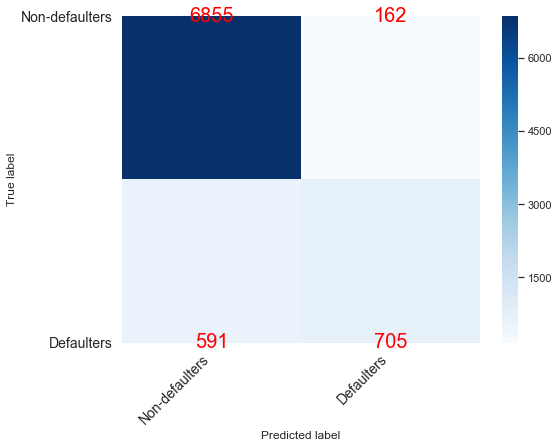

In [62]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test,y_pred_rf)
print_confusion_matrix(cm, ['Non-defaulters','Defaulters'])

In [63]:
accuracies_tr = cross_val_score(estimator=rfc, X=X_train, y=y_train.values.ravel(), cv=10 )
print("Random Forest Classifier accuracy on train set is %0.2f with a deviation of +/- %0.2f: " 
      % (accuracies_tr.mean(), accuracies_tr.std()*2))

accuracies_ts = cross_val_score(estimator=rfc, X=X_test, y=y_test.values.ravel(), cv=10 )
print("Random Forest Classifier accuracy on test set is %0.2f with a deviation of +/- %0.2f: " 
      % (accuracies_ts.mean(), accuracies_ts.std()*2))

Random Forest Classifier accuracy on train set is 0.95 with a deviation of +/- 0.16: 
Random Forest Classifier accuracy on test set is 0.89 with a deviation of +/- 0.01: 


In [64]:
from sklearn.svm import SVC

In [65]:
svm_model = SVC(random_state=0, kernel='linear') 
svm_model.fit(X_train, y_train.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [66]:
y_pred_svm = svm_model.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred_svm)
prec = precision_score(y_test, y_pred_svm)
rec = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
svm_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]], 
                           columns = ['Model','Accuracy','Precision','Recall Score','F1 Score'])
results = results.append(svm_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall Score,F1 Score
0,Logistic Regression,0.812102,0.444398,0.820216,0.576464
1,Decision Tree Classifier,0.892939,0.647529,0.687500,0.666916
2,Random_Forest_n=100,0.909419,0.813149,0.543981,0.651872
3,SVM (Linear),0.812703,0.444302,0.803241,0.572135


[[5715 1302]
 [ 255 1041]]


<Figure size 720x432 with 0 Axes>

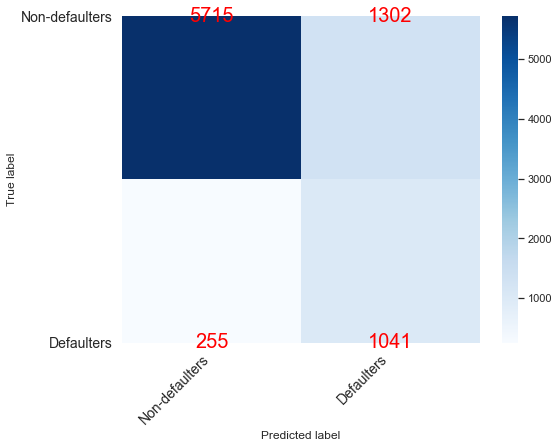

In [68]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test,y_pred_svm)
print_confusion_matrix(cm, ['Non-defaulters','Defaulters'])

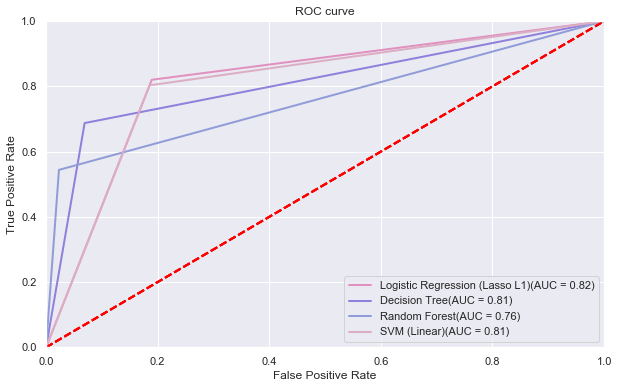

In [69]:
plt.figure(figsize=(10,6))
plotAUC(y_test, y_pred_lr, 'Logistic Regression (Lasso L1)')
plotAUC(y_test, y_pred_dt, 'Decision Tree')
plotAUC(y_test, y_pred_rf, 'Random Forest')
plotAUC(y_test, y_pred_svm, 'SVM (Linear)')
plt.show()

In [70]:
accuracies_tr = cross_val_score(estimator=svm_model, X=X_train, y=y_train.values.ravel(), cv=10 )
print("SVM (Linear) Classifier accuracy on train set is %0.2f with a deviation of +/- %0.2f: " 
      % (accuracies_tr.mean(), accuracies_tr.std()*2))

accuracies_ts = cross_val_score(estimator=logreg2, X=X_test, y=y_test.values.ravel(), cv=10 )
print("SVM (Linear) Classifier accuracy on test set is %0.2f with a deviation of +/- %0.2f: " 
      % (accuracies_ts.mean(), accuracies_ts.std()*2))

SVM (Linear) Classifier accuracy on train set is 0.83 with a deviation of +/- 0.02: 
SVM (Linear) Classifier accuracy on test set is 0.88 with a deviation of +/- 0.01: 


In [71]:
svm_model_rbf = SVC(random_state=0, kernel='rbf', gamma='auto') 
svm_model_rbf.fit(X_train, y_train.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [72]:
y_pred_svm_rbf = svm_model_rbf.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred_svm_rbf)
prec = precision_score(y_test, y_pred_svm_rbf)
rec = recall_score(y_test, y_pred_svm_rbf)
f1 = f1_score(y_test, y_pred_svm_rbf)
svm2_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]], 
                           columns = ['Model','Accuracy','Precision','Recall Score','F1 Score'])
results = results.append(svm2_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall Score,F1 Score
0,Logistic Regression,0.812102,0.444398,0.820216,0.576464
1,Decision Tree Classifier,0.892939,0.647529,0.687500,0.666916
2,Random_Forest_n=100,0.909419,0.813149,0.543981,0.651872
3,SVM (Linear),0.812703,0.444302,0.803241,0.572135
4,SVM (RBF),0.855527,0.528358,0.682870,0.595759


[[6227  790]
 [ 411  885]]


<Figure size 720x432 with 0 Axes>

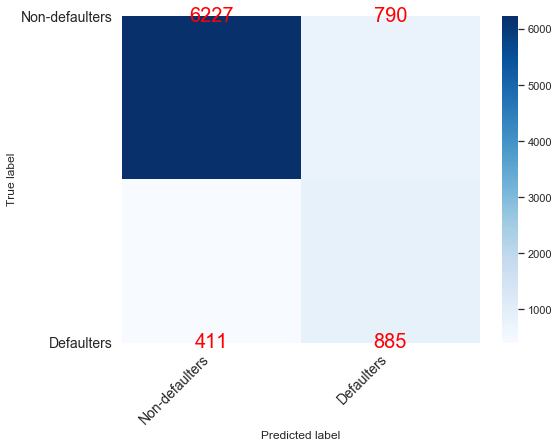

In [75]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test,y_pred_svm_rbf)
print_confusion_matrix(cm, ['Non-defaulters','Defaulters'])

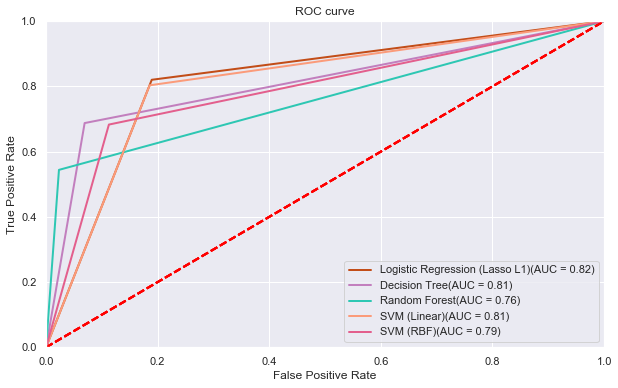

In [76]:
plt.figure(figsize=(10,6))
plotAUC(y_test, y_pred_lr, 'Logistic Regression (Lasso L1)')
plotAUC(y_test, y_pred_dt, 'Decision Tree')
plotAUC(y_test, y_pred_rf, 'Random Forest')
plotAUC(y_test, y_pred_svm, 'SVM (Linear)')
plotAUC(y_test, y_pred_svm_rbf, 'SVM (RBF)')
plt.show()

In [77]:
accuracies_tr = cross_val_score(estimator=svm_model, X=X_train, y=y_train.values.ravel(), cv=10 )
print("SVM (rbf) Classifier accuracy on train set is %0.2f with a deviation of +/- %0.2f: " 
      % (accuracies_tr.mean(), accuracies_tr.std()*2))

accuracies_ts = cross_val_score(estimator=logreg2, X=X_test, y=y_test.values.ravel(), cv=10 )
print("SVM (rbf) Classifier accuracy on test set is %0.2f with a deviation of +/- %0.2f: " 
      % (accuracies_ts.mean(), accuracies_ts.std()*2))

SVM (rbf) Classifier accuracy on train set is 0.83 with a deviation of +/- 0.02: 
SVM (rbf) Classifier accuracy on test set is 0.88 with a deviation of +/- 0.01: 


In [78]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [79]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [80]:
# Number of trees in random forest
n_estimators = [100, 500, 1000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 50, None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [81]:
# Setting the parameters to use them in Randomized Search CV.
params = {
         'bootstrap': bootstrap,
         'criterion': ['entropy'],
         'max_depth': max_depth,
         'max_features': max_features,
         'min_samples_leaf': min_samples_leaf,
         'min_samples_split': min_samples_split,
         'n_estimators': n_estimators
         }

In [82]:
# Putting the parameters in the RandomizedSearchCV tuning model.
rf_random = RandomizedSearchCV(estimator=rfc, param_distributions=params, n_iter = 100, cv = 3, 
                               verbose=2, return_train_score = True, random_state=0, n_jobs = -1, scoring='accuracy')

In [83]:
#Fitting the model
rf_random.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 544.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 672.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                                                    n_jobs=None

In [84]:
# Checking out the best parameters and accuracy after training the Random Forest Classifier model in Randomized SearchCV.
rf_random.best_params_, rf_random.best_score_

({'n_estimators': 1000,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'auto',
  'max_depth': 50,
  'criterion': 'entropy',
  'bootstrap': False},
 0.9263154077673423)

In [85]:
y_pred_random_rf = rf_random.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred_random_rf)
prec = precision_score(y_test, y_pred_random_rf)
rec = recall_score(y_test, y_pred_random_rf)
f1 = f1_score(y_test, y_pred_random_rf)
random_rf_results = pd.DataFrame([['Random_Forest_RandomCV', acc, prec, rec, f1]], 
                           columns = ['Model','Accuracy','Precision','Recall Score','F1 Score'])
results = results.append(random_rf_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall Score,F1 Score
0,Logistic Regression,0.812102,0.444398,0.820216,0.576464
1,Decision Tree Classifier,0.892939,0.647529,0.687500,0.666916
2,Random_Forest_n=100,0.909419,0.813149,0.543981,0.651872
3,SVM (Linear),0.812703,0.444302,0.803241,0.572135
4,SVM (RBF),0.855527,0.528358,0.682870,0.595759
5,Random_Forest_RandomCV,0.914712,0.846517,0.553241,0.669155


[[6887  130]
 [ 579  717]]


<Figure size 720x432 with 0 Axes>

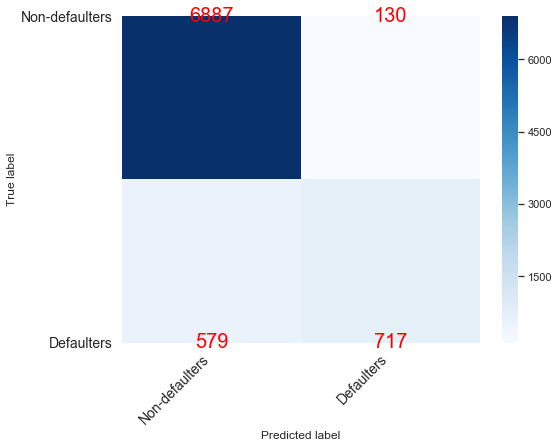

In [87]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test,y_pred_random_rf)
print_confusion_matrix(cm, ['Non-defaulters','Defaulters'])

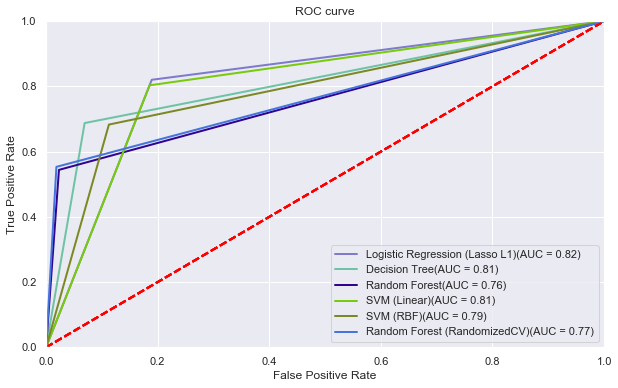

In [88]:
plt.figure(figsize=(10,6))
plotAUC(y_test, y_pred_lr, 'Logistic Regression (Lasso L1)')
plotAUC(y_test, y_pred_dt, 'Decision Tree')
plotAUC(y_test, y_pred_rf, 'Random Forest')
plotAUC(y_test, y_pred_svm, 'SVM (Linear)')
plotAUC(y_test, y_pred_svm_rbf, 'SVM (RBF)')
plotAUC(y_test, y_pred_random_rf, 'Random Forest (RandomizedCV)')
plt.show()

In [93]:
final_results = pd.concat([y_test], axis = 1).dropna()
final_results['Predictions'] = y_pred_random_rf
final_results = final_results[['loan_status','Predictions']]
final_results.head(20)

,loan_status,Predictions
3512,0,0
6110,0,0
41006,0,0
40628,0,0
21731,0,0
20401,0,0
11557,0,0
29741,0,0
34627,0,0
38217,0,0


Conclusion:
•As we can see, all the models have performed pretty well (all of them have scored accuracies over 75%). This is mainly due to the Data Cleaning part and exploration part, which made us choose the most important features
